# 데이터 가져오기

In [78]:
# ddata 가져오기
import pandas as pd
ddata = pd.read_csv('ddata.txt', sep='\t', encoding='CP949', header=None, names=['No.', 'speaker', 'talk', 'TAG'])

In [79]:
ddata.head()

,No.,speaker,talk,TAG
0,0.0,<CO>,어서오세요. 코디봇입니다. 무엇을 도와드릴까요?,INTRO
1,1.0,<US>,처음 대학교 들어가는데 입을 옷 코디해주세요.,NaN
2,2.0,<CO>,신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3.0,<AC>,SW-009,NaN
4,4.0,<US>,이 옷에 어울리는 치마로 추천해주세요.,USER_SUCCESS


In [80]:
# mdata 가져오기
mdata = pd.read_csv('mdata.txt', sep='\t', encoding='CP949', header=None, names=['ID', 'OTBS', 'type', 'FMCE', 'explain'])

In [81]:
mdata.head()

,ID,OTBS,type,FMCE,explain
0,BL-001,T,BL,F,단추 여밈의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라와 브이넥 네크라인의 결합스타일
2,BL-001,T,BL,F,손목까지 내려오는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨에서 허리까지 세로 절개에 풍성한 러플 장식


# 워드 임베딩

## 데이터 정제

In [83]:
# ddata에서 의상추천 대화 제외하고 모든 대화 가져오기
talks = ddata['talk'][ddata['speaker'] != '<AC>']
#mtalks = mdata['explain']

In [55]:
#print(dtalks.head())
#print(mtalks.head())

0                    어서오세요. 코디봇입니다. 무엇을 도와드릴까요?
1                     처음 대학교 들어가는데 입을 옷 코디해주세요.
2                신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.
4                         이 옷에 어울리는 치마로 추천해주세요.
6     고객님의 키 사이즈에 맞추면 이런 옷도 잘 어울리실 것 같은데 어떠신가요?
Name: talk, dtype: object
0                 단추 여밈의 전체 오픈형
1       스탠드 칼라와 브이넥 네크라인의 결합스타일
2              손목까지 내려오는 일자형 소매
3                        여유로운 핏
4    어깨에서 허리까지 세로 절개에 풍성한 러플 장식
Name: explain, dtype: object


In [57]:
#print(len(dtalks), len(mtalks))

130006 64632


In [58]:
#talks = pd.concat([dtalks, mtalks])

In [84]:
talks[:5]

0                    어서오세요. 코디봇입니다. 무엇을 도와드릴까요?
1                     처음 대학교 들어가는데 입을 옷 코디해주세요.
2                신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.
4                         이 옷에 어울리는 치마로 추천해주세요.
6     고객님의 키 사이즈에 맞추면 이런 옷도 잘 어울리실 것 같은데 어떠신가요?
Name: talk, dtype: object

In [85]:
print(len(talks))

130006


In [86]:
# null값 검사
talks.isnull().values.any()

True

In [87]:
talks.isnull().sum()

15

In [88]:
talks = talks.dropna()

In [89]:
talks[:5]

0                    어서오세요. 코디봇입니다. 무엇을 도와드릴까요?
1                     처음 대학교 들어가는데 입을 옷 코디해주세요.
2                신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.
4                         이 옷에 어울리는 치마로 추천해주세요.
6     고객님의 키 사이즈에 맞추면 이런 옷도 잘 어울리실 것 같은데 어떠신가요?
Name: talk, dtype: object

In [90]:
print(len(talks))

129991


In [92]:
talks = talks.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [93]:
talks[:5]

0                      어서오세요 코디봇입니다 무엇을 도와드릴까요
1                     처음 대학교 들어가는데 입을 옷 코디해주세요
2                신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요
4                         이 옷에 어울리는 치마로 추천해주세요
6     고객님의 키 사이즈에 맞추면 이런 옷도 잘 어울리실 것 같은데 어떠신가요
Name: talk, dtype: object

In [95]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다']

## 워드 임베딩 학습

In [96]:
from konlpy.tag import Okt
okt = Okt()
tokenized_data = []
for talk in talks:
    tmp = okt.morphs(talk, stem=True)
    tmp = [word for word in tmp if not word in stopwords]
    tokenized_data.append(tmp)

대화의 최대 길이 : 30
대화의 평균 길이 : 5.895823557015485


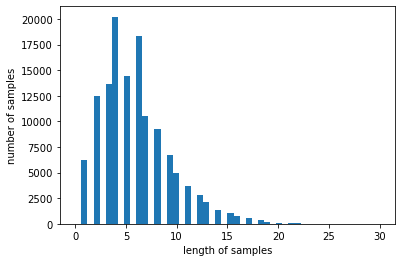

In [97]:
import matplotlib.pyplot as plt
print('대화의 최대 길이 :', max(len(l) for l in tokenized_data))
print('대화의 평균 길이 :', sum(map(len,tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [98]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [99]:
model.wv.vectors.shape

(2571, 100)

In [120]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('./data/Word2Vec')

In [123]:
print(model.wv.most_similar("모기"))

[('물리다', 0.9473070502281189), ('뚫리다', 0.9361838102340698), ('살', 0.9283466935157776), ('벌레', 0.9282516241073608), ('뛰어다니다', 0.9216130971908569), ('산이', 0.919693112373352), ('강원도', 0.919255256652832), ('오는', 0.916861891746521), ('지저분하다', 0.914044976234436), ('치렁', 0.9137977361679077)]


In [ ]:
#만 한 이다 음 아 거나 그게 라고